# Titanic Survived List Project

The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship, Titanic in early 1912. The data gives you information about multiple people like their ages, sex, sibling counts, embarkment points and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder

In [6]:
df=pd.read_csv("C:\\Users\\HP\\Desktop\\titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
724,725,1,1,"Chambers, Mr. Norman Campbell",male,27.0,1,0,113806,53.10,E8,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.30,B35,C
198,199,1,3,"Madigan, Miss. Margaret ""Maggie""",female,NaN,0,0,370370,7.75,NaN,Q
494,495,0,3,"Stanley, Mr. Edward Roland",male,21.0,0,0,A/4 45380,8.05,NaN,S
619,620,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.50,NaN,S


In [10]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df.shape

(891, 12)

In [13]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Drop unnecessary columns

In [14]:
df.drop("Cabin",axis=1,inplace=True)
df.drop("Name",axis=1,inplace=True)

In [15]:
# Checking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

Age Cabin and Embarked have null values so we treat them.

In [16]:
df['Age'].fillna(df['Age'].median(), inplace=True)   # replace with median

mode_value = df['Embarked'].mode()[0] 
df['Embarked'].fillna(mode_value, inplace=True)  # replace with mode

In [17]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

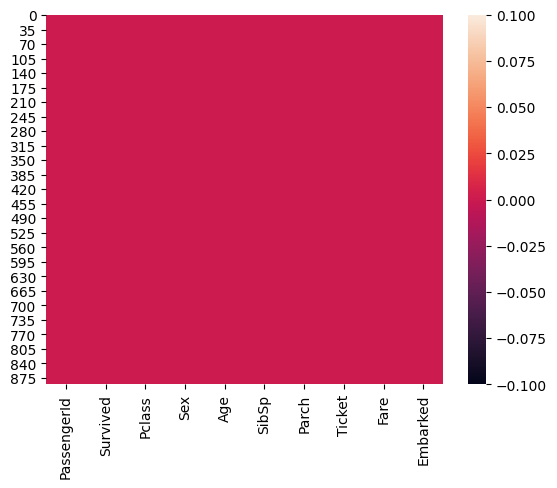

In [18]:
#plotting missing values in heatmap is there is present
sns.heatmap(df.isnull())

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


In [20]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# EDA

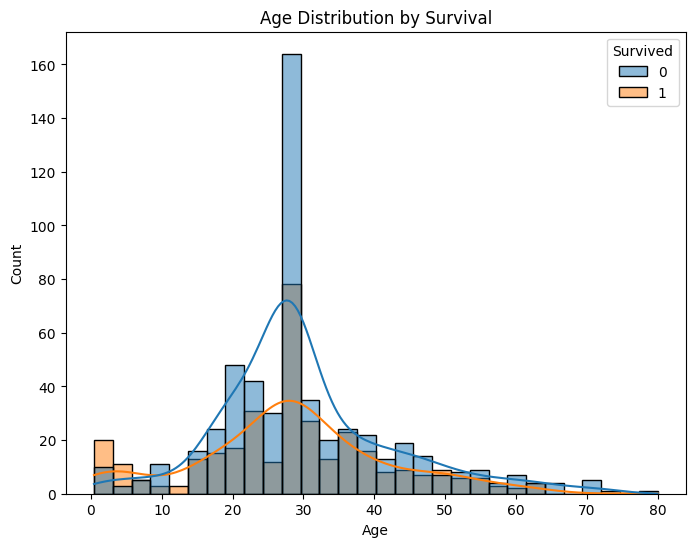

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Age', hue='Survived', kde=True)
plt.title('Age Distribution by Survival')
plt.show()

In between age group of 20-30, people had more survival and deaths.

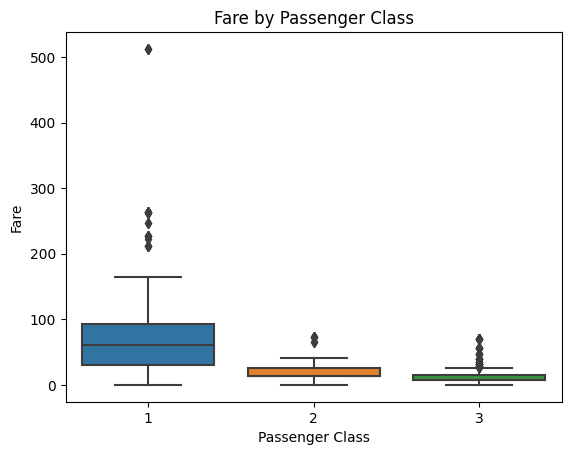

In [22]:
sns.boxplot(data=df, x='Pclass', y='Fare')
plt.title('Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

Fare are high in class 1 and low in class 3

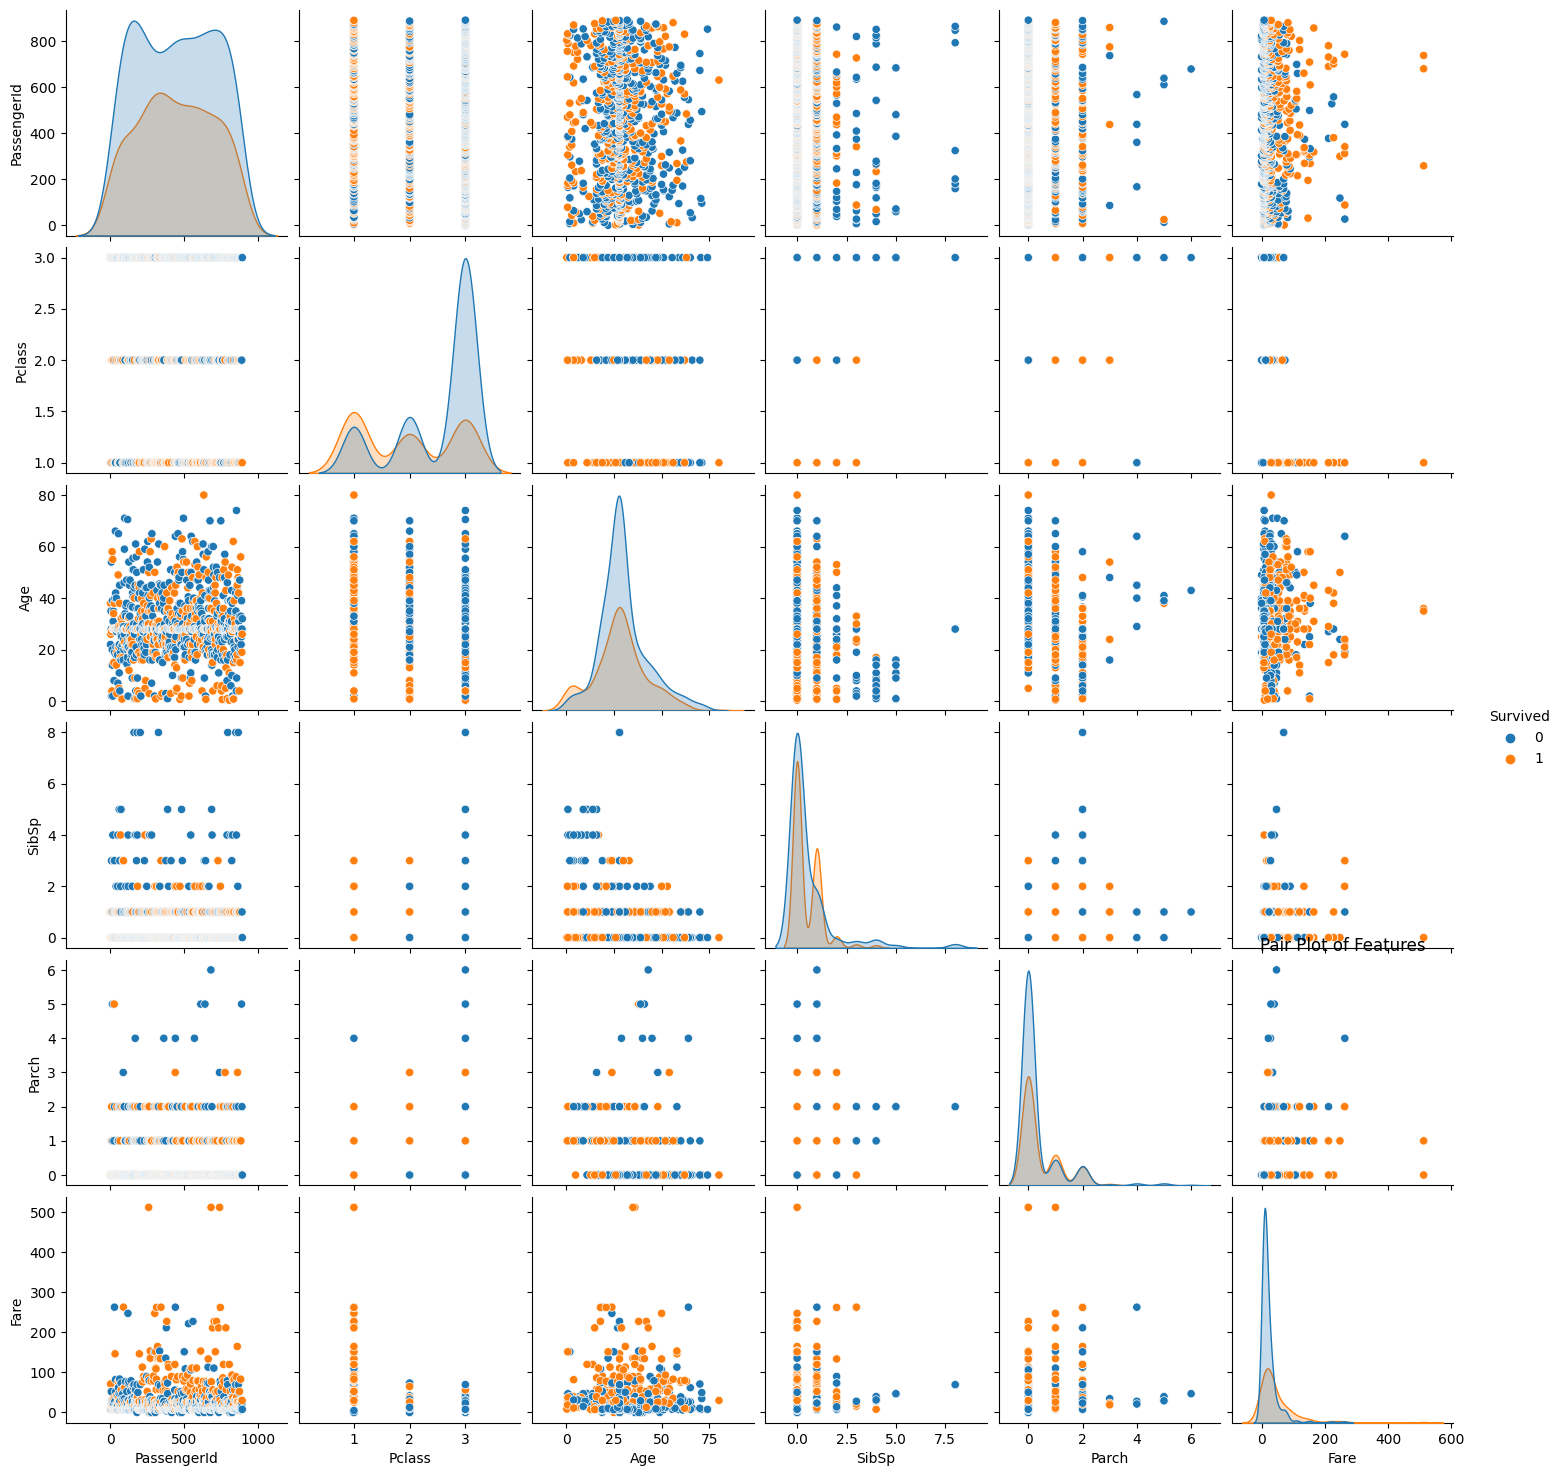

In [24]:
sns.pairplot(data=df, hue='Survived', diag_kind='kde')
plt.title('Pair Plot of Features')
plt.show()

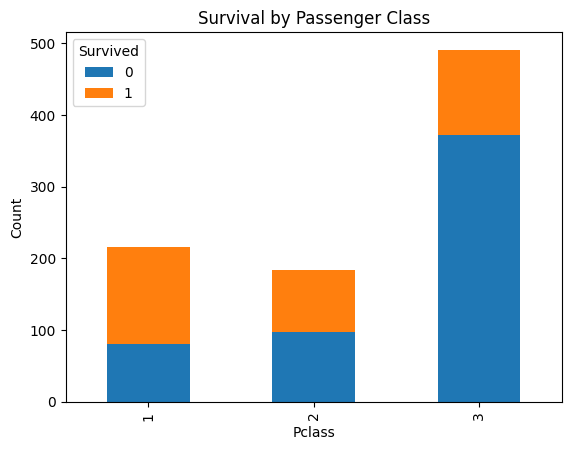

In [25]:
s = df.groupby(['Pclass', 'Survived']).size().unstack()
s.plot(kind='bar', stacked=True)
plt.title('Survival by Passenger Class')
plt.ylabel('Count')
plt.show()

As we can see there is more number of survival in class 1 Passengers

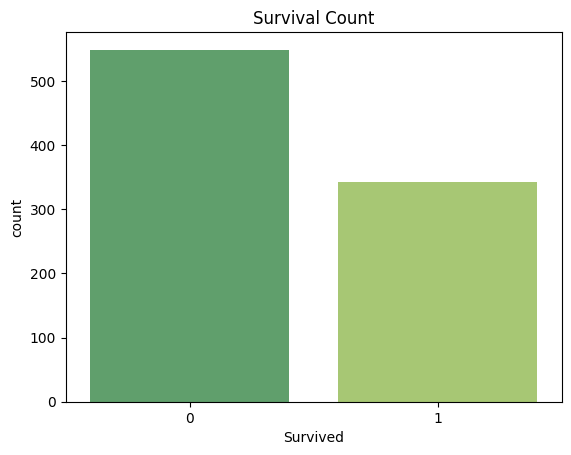

In [26]:
sns.countplot(x="Survived",data=df,palette='summer')
plt.title('Survival Count')
plt.show()

Near 300 people survived and more than 500 people died

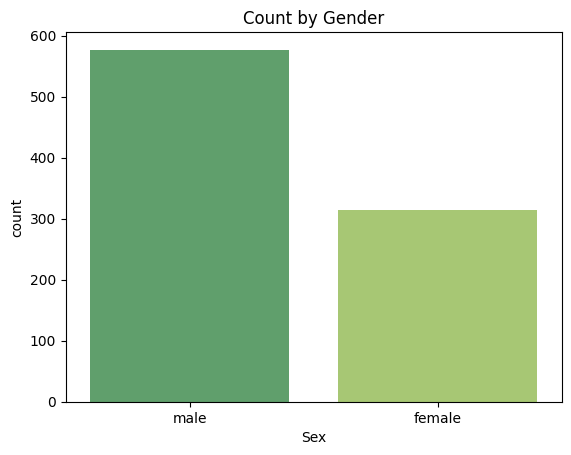

In [28]:
sns.countplot(x="Sex",data=df,palette='summer')
plt.title('Count by Gender')
plt.show()

There are nearly 600 male and 300 female on the ship



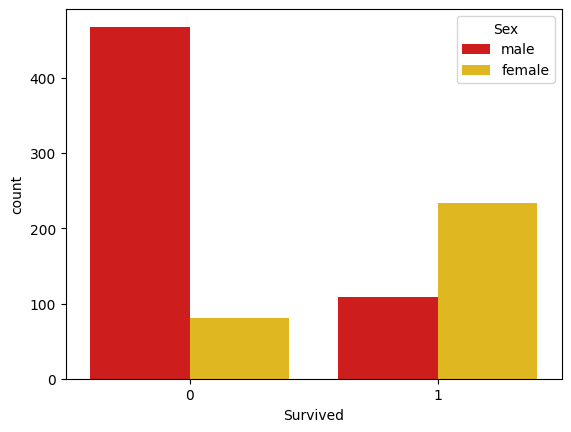

In [30]:
sns.countplot(x="Survived",hue="Sex",data=df,palette='hot')
plt.show()

More number of female survived

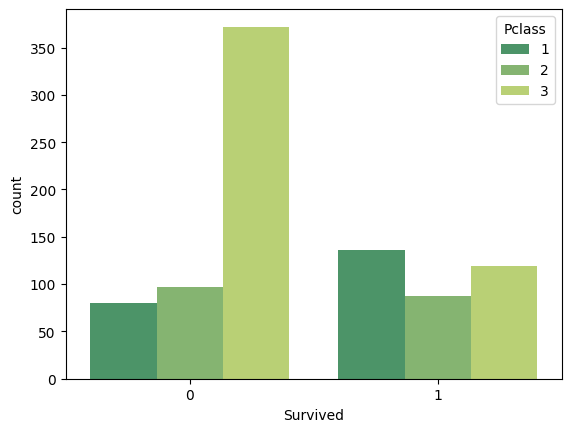

In [31]:
sns.countplot(x="Survived",hue="Pclass",data=df,palette='summer')
plt.show()

There are 3 class in the ship and the 3rd class passanger died more and 1st and 2nd class passanger survived more with less deaths it means 1st and 2nd class got more prefernce for survival protocols

<Axes: xlabel='Age', ylabel='Count'>

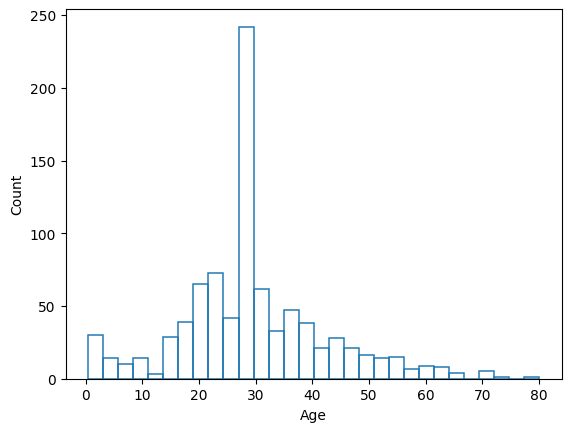

In [32]:
sns.histplot(data=df, x="Age",fill=False)

There are more number of people traveling age between 15 to 35 and very few are in age between 70-80

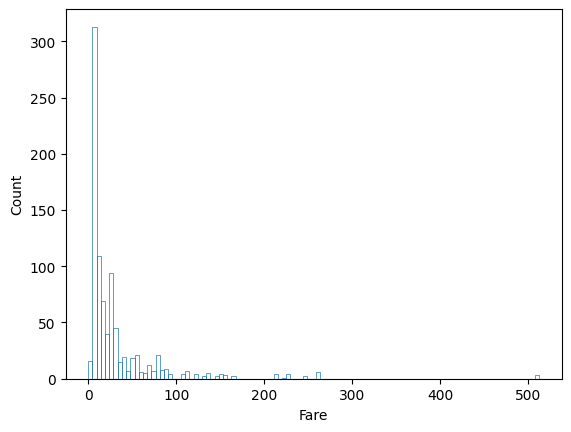

In [36]:
sns.histplot(data=df, x="Fare",fill=False)
plt.show()

most of the people bought in ticket less then 100 and very fev people brought in 500

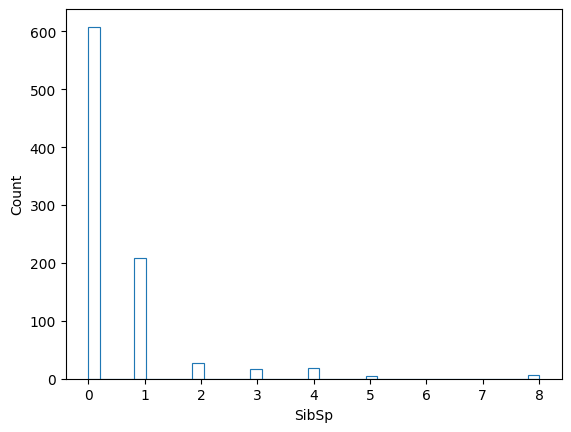

In [37]:
sns.histplot(data=df, x="SibSp",fill=False)
plt.show()

most of the people travel alone and very less people travel with siblings

# Outliers detection

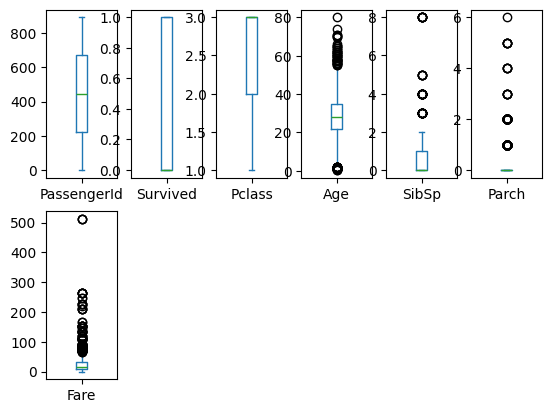

In [38]:
df.plot(kind='box',subplots=True,layout=(2,6))
plt.show()

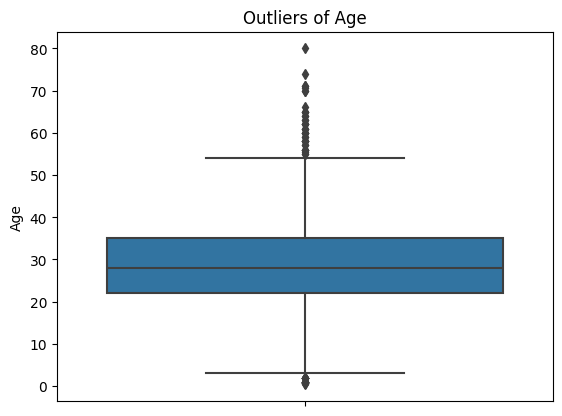

In [39]:
# Visualize outliers
sns.boxplot(data=df, y='Age')
plt.title('Outliers of Age')
plt.show()

There are some outliers in Age columns

In [40]:
#Treating outliers
from scipy import stats
z_scores= np.abs(stats.zscore(df['Age']))

threshold= 2
outlier_mask= z_scores > threshold

df_no_outliers= df[~outlier_mask]

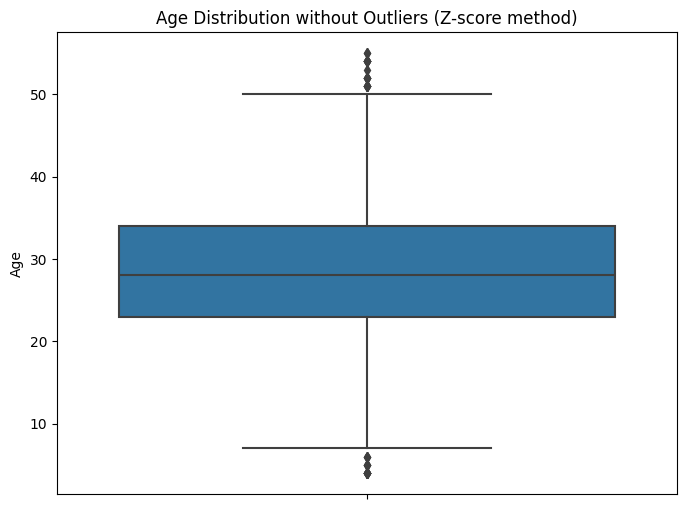

In [41]:
#visualize outliers in the Age column after removing them
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_no_outliers, y='Age')
plt.title('Age Distribution without Outliers (Z-score method)')
plt.ylabel('Age')
plt.show()

In [50]:
df_numeric = df.select_dtypes(include='number')
correlations = df_numeric.corr()

In [51]:
df_numeric.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.034212,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,0.034212,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.057527,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


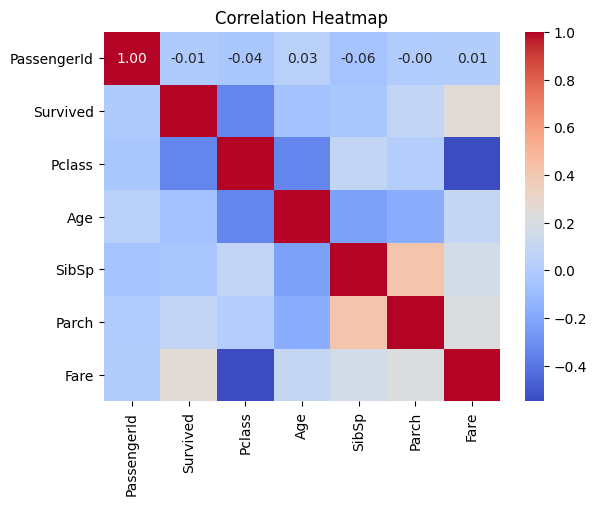

In [54]:
# Visualizing the correlation matrix by plotting a heatmap
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Convert Objects in int using Label Encoder

In [55]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['Ticket']=le.fit_transform(df['Ticket'])
df['Embarked']=le.fit_transform(df['Embarked'])

list1=['Sex','Ticket','Embarked']       
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int32  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    int32  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    int32  
dtypes: float64(2), int32(3), int64(5)
memory usage: 59.3 KB


In [57]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,472,7.2500,2
1,2,1,1,0,38.0,1,0,552,71.2833,0
2,3,1,3,0,26.0,0,0,633,7.9250,2
3,4,1,1,0,35.0,1,0,434,53.1000,2
4,5,0,3,1,35.0,0,0,415,8.0500,2


# Seperating features and label

In [58]:
x=df.drop('Survived',axis=1)
y=df["Survived"]

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

# Feature scaling

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_standardized = scaler.fit_transform(x_train)
x_test_standardized = scaler.transform(x_test)

In [61]:
print("x_train shape:",x_train.shape,)
print("y_train shape:",y_train.shape)
print("x_test shape:",x_test.shape)
print("y_test.shape:",y_test.shape)

x_train shape: (668, 9)
y_train shape: (668,)
x_test shape: (223, 9)
y_test.shape: (223,)


# RandomForestClassifier

In [62]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

predRFC = RFC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predRFC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, predRFC))
print("")
print("Classification Report:\n", classification_report(y_test, predRFC))

Accuracy: 0.8430493273542601

Confusion Matrix:
 [[121  13]
 [ 22  67]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       134
           1       0.84      0.75      0.79        89

    accuracy                           0.84       223
   macro avg       0.84      0.83      0.83       223
weighted avg       0.84      0.84      0.84       223



# MultinomialNB

In [64]:
MNB=MultinomialNB()
MNB.fit(x_train,y_train)
pred_MNB=MNB.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_MNB))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_MNB))
print("")
print("Classification Report:\n", classification_report(y_test, pred_MNB))

Accuracy: 0.6816143497757847

Confusion Matrix:
 [[105  29]
 [ 42  47]]

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.78      0.75       134
           1       0.62      0.53      0.57        89

    accuracy                           0.68       223
   macro avg       0.67      0.66      0.66       223
weighted avg       0.68      0.68      0.68       223



# K Neighbors Classification

In [65]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_knn))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_knn))
print("")
print("Classification Report:\n", classification_report(y_test, pred_knn))

Accuracy: 0.6547085201793722

Confusion Matrix:
 [[112  22]
 [ 55  34]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.84      0.74       134
           1       0.61      0.38      0.47        89

    accuracy                           0.65       223
   macro avg       0.64      0.61      0.61       223
weighted avg       0.65      0.65      0.63       223



# Support vector classifier

rbf

In [66]:
svc_rbf=SVC(kernel='rbf')
svc_rbf.fit(x_train,y_train)
predsvc_rbf=svc_rbf.predict(x_test)

print("Accuracy:", accuracy_score(y_test, predsvc_rbf))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, predsvc_rbf))
print("")
print("Classification Report:\n", classification_report(y_test, predsvc_rbf))

Accuracy: 0.6771300448430493

Confusion Matrix:
 [[131   3]
 [ 69  20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.98      0.78       134
           1       0.87      0.22      0.36        89

    accuracy                           0.68       223
   macro avg       0.76      0.60      0.57       223
weighted avg       0.74      0.68      0.61       223



# DecisionTreeClassifier

In [67]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_dtc))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_dtc))
print("")
print("Classification Report:\n", classification_report(y_test, pred_dtc))

Accuracy: 0.7533632286995515

Confusion Matrix:
 [[104  30]
 [ 25  64]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.79       134
           1       0.68      0.72      0.70        89

    accuracy                           0.75       223
   macro avg       0.74      0.75      0.75       223
weighted avg       0.76      0.75      0.75       223



# ExtraTreesClassifier

In [68]:
ETC=ExtraTreesClassifier()
ETC.fit(x_train,y_train)
pred_ETC=ETC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_ETC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_ETC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_ETC))

Accuracy: 0.8340807174887892

Confusion Matrix:
 [[120  14]
 [ 23  66]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87       134
           1       0.82      0.74      0.78        89

    accuracy                           0.83       223
   macro avg       0.83      0.82      0.82       223
weighted avg       0.83      0.83      0.83       223



# GradientBoostingClassifier

In [69]:
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
pred_GBC=GBC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_GBC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_GBC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_GBC))

Accuracy: 0.8161434977578476

Confusion Matrix:
 [[121  13]
 [ 28  61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.86       134
           1       0.82      0.69      0.75        89

    accuracy                           0.82       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.82      0.82      0.81       223



# AdaBoostClassifier

In [70]:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
pred_ABC=ABC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_ABC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_ABC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_ABC))

Accuracy: 0.8161434977578476

Confusion Matrix:
 [[117  17]
 [ 24  65]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       134
           1       0.79      0.73      0.76        89

    accuracy                           0.82       223
   macro avg       0.81      0.80      0.81       223
weighted avg       0.81      0.82      0.81       223



# BaggingClassifier

In [71]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
pred_BC=BC.predict(x_test)

print("Accuracy:", accuracy_score(y_test, pred_BC))
print("")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_BC))
print("")
print("Classification Report:\n", classification_report(y_test, pred_BC))

Accuracy: 0.7892376681614349

Confusion Matrix:
 [[117  17]
 [ 30  59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83       134
           1       0.78      0.66      0.72        89

    accuracy                           0.79       223
   macro avg       0.79      0.77      0.77       223
weighted avg       0.79      0.79      0.79       223



RandomForestClassifier gives better prediction

# Cross Validation Score

In [73]:
score = cross_val_score(RFC, x, y, cv=5)
print(score)
print(score.mean())
print( accuracy_score(y_test, predRFC) - score.mean())

[0.77094972 0.80898876 0.84831461 0.84269663 0.88202247]
0.8305944385161006
0.012454888838159484


# Saving the best model

In [74]:
import joblib
# Save the model as a objectfile

joblib.dump(RFC,'Titanic survived Project')

['Titanic survived Project']

In [75]:
model=joblib.load(open("Titanic survived Project","rb"))

In [76]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,472,7.2500,2
1,2,1,1,0,38.0,1,0,552,71.2833,0
2,3,1,3,0,26.0,0,0,633,7.9250,2
3,4,1,1,0,35.0,1,0,434,53.1000,2
4,5,0,3,1,35.0,0,0,415,8.0500,2


In [77]:
test = (1,3,1,22.0,1,0,472,7.2500,2) #taking data from 1st row of the data
arr = np.asarray(test)    # changing input_data to a numpy array
reshape = arr.reshape(1,-1)  # reshape the array
pred = model.predict(reshape)
print("Predicted value:", pred)

Predicted value: [0]


# _______________________________________________________________

# Model is Predictiong Correct

# ________________________________________________________________